## Load modules

In [3]:
import toytree
import pandas as pd

In [4]:
import ipyrad.analysis as ipa
ipa.__version__

'0.9.84'

## Load sequences

In [3]:
SEQS = "/home/cm2828/project/viburnumThings/data/Aug2022_lookingforBolivianSamples/bolivia_history_outfiles/bolivia_history.seqs.hdf5"

## Check scaffolds lengths

In [4]:
# get scaffolds sorted by length and select the biggest
scaffs = ipa.window_extracter(SEQS)
scaff_table = scaffs.scaffold_table.sort_values(by="scaffold_length", ascending=False)
display (scaff_table)
scaff_toUse = scaff_table.index.tolist() ####ALL SCAFFOLDS 
# print (scaff_toUse)
print(scaff_table.scaffold_length.sum())
print(len(scaff_toUse))

,scaffold_name,scaffold_length
3588,Scaffold_3589;HRSCAF=4012,47665733
28086,Scaffold_28087;HRSCAF=31587,44977913
17364,Scaffold_17365;HRSCAF=19499,36021024
62490,Scaffold_62491;HRSCAF=74262,28015097
61137,Scaffold_61138;HRSCAF=69458,27022671
...,...,...
56530,Scaffold_56531;HRSCAF=63672,1000
47705,Scaffold_47706;HRSCAF=53707,1000
2963,Scaffold_2964;HRSCAF=3308,1000
28804,Scaffold_28805;HRSCAF=32399,1000


3090490430
63580


### Window extractor to generate phy file
Using in this case only the biggest scaffold

In [12]:
# create imap with only incaseedum clade samples
incaseedum = ['seemenii_f_minus_PWS_3910',
 'seemenii_f_bolivianum_PWS_3909',
 'seemenii_f_minus_PWS_3913',
 'seemenii_f_minus_PWS_3911',
 'seemenii_f_minus_PWS_3912',
 'seemenii_PWS_3898',
 'seemenii_PWS_3900',
 'seemenii_PWS_3899',
 'seemenii_PWS_3894',
 'seemenii_PWS_3895',
 'seemenii_PWS_3896',
 'seemenii_PWS_3897',
 'seemenii_f_minus_PWS_3897',
 'ayavacense_PWS_3902',
 'ayavacense_PWS_3903',
 'ayavacense_PWS_3901',
 'ayavacense_PWS_3907',
 'ayavacense_PWS_3904',
 'ayavacense_PWS_3905',
 'ayavacense_PWS_3908',
 'ayavacense_PWS_3906',
 'ayavacense_PWS_3886',
 'ayavacense_PWS_3887',
 'ayavacense_PWS_3892',
 'ayavacense_PWS_3888',
 'ayavacense_PWS_3889',
 'ayavacense_PWS_3890',
 'ayavacense_PWS_3893',
 'ayavacense_PWS_3891',
 'ayavacense_PWS_3884',
 'ayavacense_PWS_3883',
 'ayavacense_PWS_3885',
 'seemenii_Maldonado_3040',
 'seemenii_Fuentes_4724',
 'seemenii_Fuentes_8750',
 'hallii_PWS_4025',
 'hallii_PWS_4023',
 'hallii_PWS_4021',
 'hallii_PWS_4022',
 'hallii_PWS_4020',
 'hallii_PWS_4024',
 'incarum_PWS_4030',
 'incarum_PWS_4026',
 'incarum_PWS_4029',
 'incarum_PWS_4027',
 'incarum_PWS_4028']

In [4]:
# Edwards_2014_04, PWS_4011, PWS_4002, and PWS_1769.
outgroup  = ["triphyllum_Edwards_2014_04",
             "triphyllum_PWS_4011",
             "ayavacense_PWS_4002",
             "triphyllum_PWS_1769"
]

In [14]:
IMAP = {
    "outgroup": outgroup,
    "ingroup": incaseedum,
}

# IMAP

In [15]:
count = 0
for i in IMAP:
    count += len(IMAP[i])
count, "samples"

(50, 'samples')

In [16]:
mincov = 0.25 #default was 0.25
rmincov = 0.1 #default was 0.1
NAME = f"10-bolivia-initial_mcov{mincov}_rcov{rmincov}_ALLscaff_SelectiveSampling"
print(NAME)

10-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling


In [10]:
wex = ipa.window_extracter(
    data=SEQS,
    scaffold_idxs=scaff_toUse,
    mincov=mincov, 
    rmincov=rmincov,
    name=NAME,
    imap=IMAP,
)

In [11]:
wex.run()

In [12]:
wex.stats

,scaff_name,scaff_len,start,end,sites_pre,sites_post,snps_pre,snps_post,missing_pre,missing_post,samples_pre,samples_post
3588,Scaffold_3589;HRSCAF=4012,47665733,0,None,465267,355301,4835,4400,0.61,0.52,50,50
28086,Scaffold_28087;HRSCAF=31587,44977913,0,None,420432,319728,4498,4040,0.61,0.52,50,50
17364,Scaffold_17365;HRSCAF=19499,36021024,0,None,360037,252208,4055,3564,0.64,0.52,50,50
62490,Scaffold_62491;HRSCAF=74262,28015097,0,None,157440,104858,1556,1377,0.65,0.52,50,50
61137,Scaffold_61138;HRSCAF=69458,27022671,0,None,151837,107715,1771,1624,0.63,0.51,50,50
...,...,...,...,...,...,...,...,...,...,...,...,...
52045,Scaffold_52046;HRSCAF=58630,1004,0,None,241,152,17,16,0.71,0.57,50,50
56782,Scaffold_56783;HRSCAF=63948,1003,0,None,170,169,1,1,0.40,0.40,50,50
38263,Scaffold_38264;HRSCAF=43093,1002,0,None,88,84,2,2,0.61,0.60,50,50
14744,Scaffold_14745;HRSCAF=16544,1001,0,None,356,172,0,0,0.80,0.66,50,50


In [13]:
wex.stats.describe()

,scaff_len,start,sites_pre,sites_post,snps_pre,snps_post,missing_pre,missing_post,samples_pre,samples_post
count,3.416000e+03,3416.0,3416.000000,3416.000000,3416.000000,3416.000000,3416.000000,3416.000000,3416.0,3416.0
mean,8.179223e+05,0.0,5305.197014,3820.260831,59.522541,53.119145,0.631628,0.558624,50.0,50.0
std,2.837415e+06,0.0,22260.658447,16374.726992,245.631678,220.902850,0.118367,0.101300,0.0,0.0
min,1.000000e+03,0.0,35.000000,3.000000,0.000000,0.000000,0.000000,0.000000,50.0,50.0
25%,3.477750e+03,0.0,178.000000,91.000000,1.000000,1.000000,0.560000,0.510000,50.0,50.0
50%,2.734100e+04,0.0,193.000000,176.000000,3.000000,2.000000,0.630000,0.550000,50.0,50.0
75%,1.052670e+05,0.0,563.750000,355.000000,10.000000,9.000000,0.710000,0.620000,50.0,50.0
max,4.766573e+07,0.0,465267.000000,355301.000000,4835.000000,4400.000000,0.940000,0.760000,50.0,50.0


In [14]:
wex.outfile

'/gpfs/ysm/project/edwards/cm2828/viburnumThings/bolivia/notebooks/phylogeny/analysis-window_extracter/10-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling.phy'

### Run RAXML

In [19]:
import ipyrad.analysis as ipa
ipa.__version__

'0.9.84'

In [41]:
NAME = '10-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling'

In [21]:
rax = ipa.raxml("./analysis-window_extracter/10-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling.phy", name=NAME, T=36, N=100, m="GTRCAT")

In [22]:
print(rax.command)

/gpfs/ysm/project/edwards/cm2828/conda_envs/ipyrad_from_conda/bin/raxmlHPC-PTHREADS-AVX2 -f a -T 36 -m GTRCAT -n 10-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling -w /gpfs/ysm/project/edwards/cm2828/viburnumThings/bolivia/notebooks/phylogeny/analysis-raxml -s /gpfs/ysm/project/edwards/cm2828/viburnumThings/bolivia/notebooks/phylogeny/analysis-window_extracter/10-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling.phy -p 54321 -N 100 -x 12345


In [ ]:
rax.run()

In [36]:
rax.trees

bestTree                   /gpfs/ysm/project/edwards/cm2828/viburnumThings/bolivia/notebooks/phylogeny/analysis-raxml/RAxML_bestTree.10-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling
bipartitions               /gpfs/ysm/project/edwards/cm2828/viburnumThings/bolivia/notebooks/phylogeny/analysis-raxml/RAxML_bipartitions.10-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling
bipartitionsBranchLabels   /gpfs/ysm/project/edwards/cm2828/viburnumThings/bolivia/notebooks/phylogeny/analysis-raxml/RAxML_bipartitionsBranchLabels.10-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling
bootstrap                  /gpfs/ysm/project/edwards/cm2828/viburnumThings/bolivia/notebooks/phylogeny/analysis-raxml/RAxML_bootstrap.10-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling
info                       /gpfs/ysm/project/edwards/cm2828/viburnumThings/bolivia/notebooks/phylogeny/analysis-raxml/RAxML_info.10-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling

#### Get final names and print RAXML results

In [5]:
import dbgdrive
fulldata = dbgdrive.get_database(sheet_name='sample-data', id_spreadsheet='**', api_key='**')

In [6]:
# fulldata = pd.read_csv("/home/cm2828/project/viburnumThings/data/Oreinotinus-sample-data.csv")

In [7]:
#in this cell I am modifying the names (last id and specimen).
sdata = fulldata[["NameInAssembly","UltimateName"]]

namedict = {}
for i in range(sdata.shape[0]):
    namedict[sdata.iloc[i, 0]] = sdata.iloc[i, 1]
        

# namedict["reference"] = "V. lautum 2"

# colordata = colors[["sp","color"]]
# colordict = {colordata.iloc[i, 0]: str(colordata.iloc[i, 1]) for i in range(colordata.shape[0])}

In [20]:
NAME

'10-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling'

In [2]:
import toytree
treeFile = f"./analysis-raxml/RAxML_bipartitions.10-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling"
tre = toytree.tree(treeFile)

In [3]:
# Edwards_2014_04, PWS_4011, PWS_4002, and PWS_1769.
outgroup  = ["triphyllum_Edwards_2014_04",
             "triphyllum_PWS_4011",
             "ayavacense_PWS_4002",
             "triphyllum_PWS_1769"
]

In [4]:
rtre = tre.root(outgroup)

In [7]:
rtre.write(f"{treeFile}_rooted")

In [11]:
#Root tree
# rtre = tre.root(wildcard="pastasanum_PWS_1799") #this is the assembly name
rtre = tre.root(outgroup)

# Do some rotations to fit with geo
# for i in [96]:
#     rtre.idx_dict[i].children.reverse()
#     rtre._coords.update()


#Set new names
labels_updated = [namedict[i] for i in rtre.get_tip_labels()]
# color_labels = []

#Set color base on leaf form
# for i in labels_updated:
#     result = "Black"
#     for key, item in colordict.items():
#         if i.find(key) > -1:
#             result = item
#     color_labels.append(result)


#Collapse weak supported nodes
# rtre = rtre.collapse_nodes(min_support=75)

#Define threshold
support_value_threshold = 84



canvas, axes, marks = rtre.draw(
    height=900, width=600, 
    use_edge_lengths=True,
    tip_labels_align=True,
    tip_labels_style={"font-size": "12px"},
    tip_labels=labels_updated,
#     tip_labels_colors=color_labels,
    node_sizes=[5 if i else 0 for i in rtre.get_node_values()],
    node_colors=['black' if (i and int(i) > support_value_threshold) else 'white' for i in rtre.get_node_values('support', 1, 1)],
#     node_colors=colors,
    node_style={"stroke": "black", "stroke-width": 1},
    node_labels="support",
    # node_labels=['' if (i and int(i) > support_value_threshold) else i for i in rtre.get_node_values('support', 1, 0)],
    node_labels_style= {
        "-toyplot-anchor-shift": "10px",
        "baseline-shift": "0px",
        "text-shadow": "0.5px 0.5px #fff, -0.5px 0.5px #fff, 0.5px -0.5px #fff, -0.5px -0.5px #fff",
        "fill": "#000",
        "font-size": 8,
    },
#     node_labels="idx",
);


# add title
canvas.text(30,30, f"{treeFile.split('/')[2]}", style={"text-anchor":"start", "font-size":"14px"});

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="600.0px" height="900.0px" viewBox="0 0 600.0 900.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="te27d3b91645d4762b99ca1285414bb6e"> 98 98 98 42 100 100 100 100 100 85 93 100 96 99 96 98 70 100 100 59 59 94 94 100 100 100 100 100 100 100 100 3 34 100 100 3 52 76 100 100 63 72 99 100 100 100 100 100 new_name_2-PWS_3909 new_name_2-PWS_3910 new_name_2-PWS_3913 new_name_2-PWS_3912 new_name_2-PWS_3911 new_name_2-PWS_3900 new_name_2-PWS_3898 new_name_2-PWS_3899 new_name_2-PWS_3894 new_name_2-PWS_3895 new_name_2-PWS_3896 new_name_2-PWS_3897minus new_name_2-PWS_3897 seemenii-PWS_3903 seemenii-PWS_3902 seemenii-PWS_3901 seemenii-PWS_3907 seemenii-PWS_3904 seemenii-PWS_3905 seemenii-PWS_3906 seemenii-PWS_3908 seemenii-PWS_3887 seemenii-PWS_3886 seemenii-PWS_3892 seemenii-PWS_3888 seemenii-PWS_3889 seemenii-PWS_3893 seemenii-PWS_3890 seemenii-PWS_3891 seemenii-PWS_3884 seemenii-PWS_3883 seemenii-PWS_3885 seemenii-Fuentes_4724 seemenii-Maldonado_3040 seemenii-Fuentes_8750 seemenii-PWS_4021 seemenii-PWS_4020 seemenii-PWS_4022 seemenii-PWS_4023 seemenii-PWS_4024 seemenii-PWS_4025 incarum-PWS_4026 incarum-PWS_4030 incarum-PWS_4029 incarum-PWS_4028 incarum-PWS_4027 new_name_1-PWS_4011 ayavacense-PWS_4002 new_name_1-PWS_1769 new_name_1-Edwards_2014_04 RAxML_bipartitions.10-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling

In [16]:
import toyplot.pdf

toyplot.svg.render(canvas, "./svgs/10-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling.svg")

In [72]:
# update label not only for presentation, this creates a new tree with current names, and exports it.
updateddict = {}
for i in rtre.get_tip_labels():
    updateddict[i] = namedict[i]

    
testtre = rtre.set_node_values(
    feature="name",
    values=updateddict,
)

testtre.write(f"{treeFile}_RENAMED", tree_format=0)

## Create table

In [1]:
#get database
import dbgdrive
fulldata = dbgdrive.get_database(sheet_name='sample-data', id_spreadsheet='**', api_key='**')

In [5]:
fulldata.columns

Index(['NameInAssembly', 'Last_valid_name', 'state', 'reads_raw',
       'reads_passed_filter', 'clusters_total', 'clusters_hidepth',
       'hetero_est', 'error_est', 'reads_consens', 'loci_in_assembly',
       'bolivia_history', 'incarum-seemanii-new2', 'spp_dataset',
       'full_dataset', 'full_dataset_withAyava', 'for_abba_tests',
       '3specimens_dataset', 'acut-sulc', 'juc-laut', 'micro-caud',
       'totontepec', 'oaxaca', 'chiapas', 'puebla', 'jamaica', 'colombia',
       'ecuador', 'bolivia', '7 orphans', '.', 'SearchName_Extracted',
       'RowInFullData', 'DoublecheckSampleNameInFull', 'Lat', 'Long',
       'species_outdated', 'group', 'Country', 'Locality', '.',
       'latlong_Problem', 'identity_Problem', 'phylo_Problem',
       'Notes meeting Feb6th2020', 'Sent question to Michael April 2020',
       'April Michael's comments, or *Changes in May',
       'July 24 Michael meeting', 'January 2021',
       'Feb. 9, 2021 Michael meeting notes', 'Feb. 15, 2021 Micheale mee

In [2]:
# fulldata = pd.read_csv("/home/cm2828/project/viburnumThings/data/Oreinotinus-sample-data.csv")

In [3]:
#get tree and list of samples included finally in the tree
import toytree
treeFile = f"./analysis-raxml/RAxML_bipartitions.10-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling"
tre = toytree.tree(treeFile)

outgroup  = ["triphyllum_Edwards_2014_04",
             "triphyllum_PWS_4011",
             "ayavacense_PWS_4002",
             "triphyllum_PWS_1769"
            ]
tre = tre.root(outgroup)

list_tips = tre.get_tip_labels()
len(list_tips)

50

In [13]:
## add columns with the clade every sample belong
# define groups using the main clades (c1 to c7)

idxs_clades = [94,89,84,79,75,68,67]
# rtree.draw(use_edge_lengths=False, node_labels=True, node_sizes=20)


clades_imap = {}
for index, node in enumerate(idxs_clades):
    for tip in tre.get_tip_labels(node):
        clades_imap[tip] = f"c{index+1}"

    
#name properly the outgroup    
for tip in outgroup:
    clades_imap[tip] = "out"

clades_imap

{'incarum_PWS_4026': 'c1',
 'incarum_PWS_4030': 'c1',
 'incarum_PWS_4029': 'c1',
 'incarum_PWS_4028': 'c1',
 'incarum_PWS_4027': 'c1',
 'hallii_PWS_4021': 'c2',
 'hallii_PWS_4020': 'c2',
 'hallii_PWS_4022': 'c2',
 'hallii_PWS_4023': 'c2',
 'hallii_PWS_4024': 'c2',
 'hallii_PWS_4025': 'c2',
 'seemenii_Fuentes_4724': 'c3',
 'seemenii_Maldonado_3040': 'c3',
 'seemenii_Fuentes_8750': 'c3',
 'ayavacense_PWS_3887': 'c4',
 'ayavacense_PWS_3886': 'c4',
 'ayavacense_PWS_3892': 'c4',
 'ayavacense_PWS_3888': 'c4',
 'ayavacense_PWS_3889': 'c4',
 'ayavacense_PWS_3893': 'c4',
 'ayavacense_PWS_3890': 'c4',
 'ayavacense_PWS_3891': 'c4',
 'ayavacense_PWS_3884': 'c4',
 'ayavacense_PWS_3883': 'c4',
 'ayavacense_PWS_3885': 'c4',
 'ayavacense_PWS_3907': 'c5',
 'ayavacense_PWS_3904': 'c5',
 'ayavacense_PWS_3905': 'c5',
 'ayavacense_PWS_3906': 'c5',
 'ayavacense_PWS_3908': 'c5',
 'ayavacense_PWS_3903': 'c6',
 'ayavacense_PWS_3902': 'c6',
 'ayavacense_PWS_3901': 'c6',
 'seemenii_f_bolivianum_PWS_3909': 'c7',


In [11]:
## add columns with the clade every sample belong
# define groups using the main clades (c1 to c7)

idxs_clades = [94,89,84,79,75,68,61,60]
# rtree.draw(use_edge_lengths=False, node_labels=True, node_sizes=20)


clades_imap_restricted = {}
for index, node in enumerate(idxs_clades):
    for tip in tre.get_tip_labels(node):
        clades_imap_restricted[tip] = f"c{index+1}"

    
#name properly the outgroup    
for tip in outgroup:
    clades_imap_restricted[tip] = "out"

clades_imap_restricted

{'incarum_PWS_4026': 'c1',
 'incarum_PWS_4030': 'c1',
 'incarum_PWS_4029': 'c1',
 'incarum_PWS_4028': 'c1',
 'incarum_PWS_4027': 'c1',
 'hallii_PWS_4021': 'c2',
 'hallii_PWS_4020': 'c2',
 'hallii_PWS_4022': 'c2',
 'hallii_PWS_4023': 'c2',
 'hallii_PWS_4024': 'c2',
 'hallii_PWS_4025': 'c2',
 'seemenii_Fuentes_4724': 'c3',
 'seemenii_Maldonado_3040': 'c3',
 'seemenii_Fuentes_8750': 'c3',
 'ayavacense_PWS_3887': 'c4',
 'ayavacense_PWS_3886': 'c4',
 'ayavacense_PWS_3892': 'c4',
 'ayavacense_PWS_3888': 'c4',
 'ayavacense_PWS_3889': 'c4',
 'ayavacense_PWS_3893': 'c4',
 'ayavacense_PWS_3890': 'c4',
 'ayavacense_PWS_3891': 'c4',
 'ayavacense_PWS_3884': 'c4',
 'ayavacense_PWS_3883': 'c4',
 'ayavacense_PWS_3885': 'c4',
 'ayavacense_PWS_3907': 'c5',
 'ayavacense_PWS_3904': 'c5',
 'ayavacense_PWS_3905': 'c5',
 'ayavacense_PWS_3906': 'c5',
 'ayavacense_PWS_3908': 'c5',
 'ayavacense_PWS_3903': 'c6',
 'ayavacense_PWS_3902': 'c6',
 'ayavacense_PWS_3901': 'c6',
 'seemenii_PWS_3894': 'c7',
 'seemenii_PW

In [ ]:
#in this cell I am modifying the names for journal friendly names.
smasked = fulldata[fulldata["NameInAssembly"].isin(list_tips)]
sdata = smasked[["NameInAssembly","UltimateName","Country","Locality","Lat","Long", "Lastest_SP_name"]]

namedict = {}
for i in range(sdata.shape[0]):
    # part = sdata.iloc[i, 1].split("-")
    # spnum = sdata.iloc[i, 2]
    # if spnum == None:
    #     spnum = ""
    # else:
    #     spnum = " " + spnum
    namedict[sdata.iloc[i, 0]] = {
                                  "NameInAssembly": sdata.iloc[i, 0],
                                  "UltimateName": sdata.iloc[i, 1],
                                  "Latitude": sdata.iloc[i, 4],
                                  "Longitude": sdata.iloc[i, 5],
                                  "Species": sdata.iloc[i, 6],
                                  "Clade": clades_imap[sdata.iloc[i, 0]]
                                  }


In [26]:
# namedict

In [24]:
final_db = pd.DataFrame.from_dict(namedict, orient='index')

In [28]:
final_db = final_db.sort_values(by=['Clade'])

In [29]:
final_db

,NameInAssembly,UltimateName,Latitude,Longitude,Species,Clade
incarum_PWS_4026,incarum_PWS_4026,incarum-PWS_4026,-11.250980,-75.585540,incarum,c1
incarum_PWS_4027,incarum_PWS_4027,incarum-PWS_4027,-11.250980,-75.585540,incarum,c1
incarum_PWS_4028,incarum_PWS_4028,incarum-PWS_4028,-11.255650,-75.592450,incarum,c1
incarum_PWS_4029,incarum_PWS_4029,incarum-PWS_4029,-11.236900,-75.518150,incarum,c1
incarum_PWS_4030,incarum_PWS_4030,incarum-PWS_4030,-11.229090,-75.514200,incarum,c1
hallii_PWS_4025,hallii_PWS_4025,seemenii-PWS_4025,-13.070490,-71.567150,seemenii,c2
hallii_PWS_4023,hallii_PWS_4023,seemenii-PWS_4023,-13.071850,-71.567480,seemenii,c2
hallii_PWS_4022,hallii_PWS_4022,seemenii-PWS_4022,-13.123780,-71.572980,seemenii,c2
hallii_PWS_4021,hallii_PWS_4021,seemenii-PWS_4021,-13.164410,-71.594450,seemenii,c2
hallii_PWS_4020,hallii_PWS_4020,seemenii-PWS_4020,-13.184040,-71.587900,seemenii,c2


In [30]:
final_db.to_csv("./tables/RAxML_bipartitions.10-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling_WITHCLADES.csv", index=False)

## Create list of samples in incaseedum clade (assembly names)

Usefull for more focused analyses (such as Structure)

In [5]:
treeFile = F"./analysis-raxml/RAxML_bipartitions.10-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling"
tre = toytree.tree(treeFile)

In [7]:
tre = tre.root(outgroup)
tre.draw(node_labels=True, use_edge_lengths=False, node_sizes=20)

(<toyplot.canvas.Canvas at 0x2b992221dd80>,
 <toytree.Render.ToytreeMark at 0x2b9922237070>)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="400.0px" height="900.0px" viewBox="0 0 400.0 900.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tc3f050bf2f9145118a964a339cfb7307"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 seemenii_f_bolivianum_PWS_3909 seemenii_f_minus_PWS_3910 seemenii_f_minus_PWS_3913 seemenii_f_minus_PWS_3912 seemenii_f_minus_PWS_3911 seemenii_PWS_3900 seemenii_PWS_3898 seemenii_PWS_3899 seemenii_PWS_3894 seemenii_PWS_3895 seemenii_PWS_3896 seemenii_f_minus_PWS_3897 seemenii_PWS_3897 ayavacense_PWS_3903 ayavacense_PWS_3902 ayavacense_PWS_3901 ayavacense_PWS_3907 ayavacense_PWS_3904 ayavacense_PWS_3905 ayavacense_PWS_3906 ayavacense_PWS_3908 ayavacense_PWS_3887 ayavacense_PWS_3886 ayavacense_PWS_3892 ayavacense_PWS_3888 ayavacense_PWS_3889 ayavacense_PWS_3893 ayavacense_PWS_3890 ayavacense_PWS_3891 ayavacense_PWS_3884 ayavacense_PWS_3883 ayavacense_PWS_3885 seemenii_Fuentes_4724 seemenii_Maldonado_3040 seemenii_Fuentes_8750 hallii_PWS_4021 hallii_PWS_4020 hallii_PWS_4022 hallii_PWS_4023 hallii_PWS_4024 hallii_PWS_4025 incarum_PWS_4026 incarum_PWS_4030 incarum_PWS_4029 incarum_PWS_4028 incarum_PWS_4027 triphyllum_PWS_4011 ayavacense_PWS_4002 triphyllum_PWS_1769 triphyllum_Edwards_2014_04

In [8]:
tre.get_tip_labels(96)

['seemenii_f_bolivianum_PWS_3909',
 'seemenii_f_minus_PWS_3910',
 'seemenii_f_minus_PWS_3913',
 'seemenii_f_minus_PWS_3912',
 'seemenii_f_minus_PWS_3911',
 'seemenii_PWS_3900',
 'seemenii_PWS_3898',
 'seemenii_PWS_3899',
 'seemenii_PWS_3894',
 'seemenii_PWS_3895',
 'seemenii_PWS_3896',
 'seemenii_f_minus_PWS_3897',
 'seemenii_PWS_3897',
 'ayavacense_PWS_3903',
 'ayavacense_PWS_3902',
 'ayavacense_PWS_3901',
 'ayavacense_PWS_3907',
 'ayavacense_PWS_3904',
 'ayavacense_PWS_3905',
 'ayavacense_PWS_3906',
 'ayavacense_PWS_3908',
 'ayavacense_PWS_3887',
 'ayavacense_PWS_3886',
 'ayavacense_PWS_3892',
 'ayavacense_PWS_3888',
 'ayavacense_PWS_3889',
 'ayavacense_PWS_3893',
 'ayavacense_PWS_3890',
 'ayavacense_PWS_3891',
 'ayavacense_PWS_3884',
 'ayavacense_PWS_3883',
 'ayavacense_PWS_3885',
 'seemenii_Fuentes_4724',
 'seemenii_Maldonado_3040',
 'seemenii_Fuentes_8750',
 'hallii_PWS_4021',
 'hallii_PWS_4020',
 'hallii_PWS_4022',
 'hallii_PWS_4023',
 'hallii_PWS_4024',
 'hallii_PWS_4025',
 'inc

## Create circular tree with clades highligted

In [8]:
#in this cell I am modifying the names (last id and specimen).
sdata = fulldata[["NameInAssembly","UltimateName"]]

namedict = {}
for i in range(sdata.shape[0]):
    namedict[sdata.iloc[i, 0]] = sdata.iloc[i, 1]
        

# namedict["reference"] = "V. lautum 2"

# colordata = colors[["sp","color"]]
# colordict = {colordata.iloc[i, 0]: str(colordata.iloc[i, 1]) for i in range(colordata.shape[0])}

In [14]:
#Root tree
# rtre = tre.root(wildcard="pastasanum_PWS_1799") #this is the assembly name
rtre = tre.root(outgroup)

# Do some rotations to fit with geo
# for i in [96]:
#     rtre.idx_dict[i].children.reverse()
#     rtre._coords.update()


#Set new names
labels_updated = [namedict[i] for i in rtre.get_tip_labels()]
# color_labels = []

#Set color base on leaf form
# for i in labels_updated:
#     result = "Black"
#     for key, item in colordict.items():
#         if i.find(key) > -1:
#             result = item
#     color_labels.append(result)


#Collapse weak supported nodes
# rtre = rtre.collapse_nodes(min_support=75)

#Define threshold
support_value_threshold = 84


dic_edges = {}
for idx, node in enumerate([94,89,84,79,75,68,67]):
    dic_edges[node] = toytree.colors[idx]
ecolors = rtre.get_edge_values_mapped(dic_edges)


canvas, axes, marks = rtre.draw(layout="c",
    edge_colors=ecolors,
    height=1000, width=1000, 
    use_edge_lengths=False,
    tip_labels_align=True,
    tip_labels_style={"font-size": "12px"},
    tip_labels=labels_updated,
    edge_widths="5px"
#     tip_labels_colors=color_labels,
    # node_sizes=[5 if i else 0 for i in rtre.get_node_values()],
    # node_colors=['black' if (i and int(i) > support_value_threshold) else 'white' for i in rtre.get_node_values('support', 1, 1)],
#     node_colors=colors,
    # node_style={"stroke": "black", "stroke-width": 1},
    # node_labels=True,
    # node_labels=['' if (i and int(i) > support_value_threshold) else i for i in rtre.get_node_values('support', 1, 0)],
    # node_labels_style= {
    #     "-toyplot-anchor-shift": "10px",
    #     "baseline-shift": "0px",
    #     "text-shadow": "0.5px 0.5px #fff, -0.5px 0.5px #fff, 0.5px -0.5px #fff, -0.5px -0.5px #fff",
    #     "fill": "#000",
    #     "font-size": 8,
    # },
#     node_labels="idx",
);



# add title
# canvas.text(30,30, f"{treeFile.split('/')[2]}", style={"text-anchor":"start", "font-size":"14px"});

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="1000.0px" height="1000.0px" viewBox="0 0 1000.0 1000.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t86b7e099ac9740d6abd3dbb0a9a9e959"> new_name_2-PWS_3909 new_name_2-PWS_3910 new_name_2-PWS_3913 new_name_2-PWS_3912 new_name_2-PWS_3911 new_name_2-PWS_3900 new_name_2-PWS_3898 new_name_2-PWS_3899 new_name_2-PWS_3894 new_name_2-PWS_3895 new_name_2-PWS_3896 new_name_2-PWS_3897minus new_name_2-PWS_3897 seemenii-PWS_3903 seemenii-PWS_3902 seemenii-PWS_3901 seemenii-PWS_3907 seemenii-PWS_3904 seemenii-PWS_3905 seemenii-PWS_3906 seemenii-PWS_3908 seemenii-PWS_3887 seemenii-PWS_3886 seemenii-PWS_3892 seemenii-PWS_3888 seemenii-PWS_3889 seemenii-PWS_3893 seemenii-PWS_3890 seemenii-PWS_3891 seemenii-PWS_3884 seemenii-PWS_3883 seemenii-PWS_3885 seemenii-Fuentes_4724 seemenii-Maldonado_3040 seemenii-Fuentes_8750 seemenii-PWS_4021 seemenii-PWS_4020 seemenii-PWS_4022 seemenii-PWS_4023 seemenii-PWS_4024 seemenii-PWS_4025 incarum-PWS_4026 incarum-PWS_4030 incarum-PWS_4029 incarum-PWS_4028 incarum-PWS_4027 new_name_1-PWS_4011 ayavacense-PWS_4002 new_name_1-PWS_1769 new_name_1-Edwards_2014_04

In [100]:
import toyplot.pdf

toyplot.svg.render(canvas, "./svgs/10-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling_CIRCULAR.svg")

In [18]:
#Root tree
# rtre = tre.root(wildcard="pastasanum_PWS_1799") #this is the assembly name
rtre = tre.root(outgroup)

# Do some rotations to fit with geo
# for i in [96]:
#     rtre.idx_dict[i].children.reverse()
#     rtre._coords.update()


#Set new names
labels_updated = [namedict[i] for i in rtre.get_tip_labels()]
# color_labels = []

#Set color base on leaf form
# for i in labels_updated:
#     result = "Black"
#     for key, item in colordict.items():
#         if i.find(key) > -1:
#             result = item
#     color_labels.append(result)


#Collapse weak supported nodes
# rtre = rtre.collapse_nodes(min_support=75)

#Define threshold
support_value_threshold = 84


dic_edges = {}
for idx, node in enumerate([94,89,84,79,75,68,67]):
    dic_edges[node] = toytree.colors[idx]
ecolors = rtre.get_edge_values_mapped(dic_edges)


canvas, axes, marks = rtre.draw(
    # layout="c",
    edge_colors=ecolors,
    height=1000, width=500, 
    use_edge_lengths=False,
    tip_labels_align=True,
    tip_labels_style={"font-size": "12px"},
    tip_labels=labels_updated,
    edge_widths=4
#     tip_labels_colors=color_labels,
    # node_sizes=[5 if i else 0 for i in rtre.get_node_values()],
    # node_colors=['black' if (i and int(i) > support_value_threshold) else 'white' for i in rtre.get_node_values('support', 1, 1)],
#     node_colors=colors,
    # node_style={"stroke": "black", "stroke-width": 1},
    # node_labels=True,
    # node_labels=['' if (i and int(i) > support_value_threshold) else i for i in rtre.get_node_values('support', 1, 0)],
    # node_labels_style= {
    #     "-toyplot-anchor-shift": "10px",
    #     "baseline-shift": "0px",
    #     "text-shadow": "0.5px 0.5px #fff, -0.5px 0.5px #fff, 0.5px -0.5px #fff, -0.5px -0.5px #fff",
    #     "fill": "#000",
    #     "font-size": 8,
    # },
#     node_labels="idx",
);



# add title
# canvas.text(30,30, f"{treeFile.split('/')[2]}", style={"text-anchor":"start", "font-size":"14px"});

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="1000.0px" viewBox="0 0 500.0 1000.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t79ec7cb45bb3481397e836184bd6dbb1"> new_name_2-PWS_3909 new_name_2-PWS_3910 new_name_2-PWS_3913 new_name_2-PWS_3912 new_name_2-PWS_3911 new_name_2-PWS_3900 new_name_2-PWS_3898 new_name_2-PWS_3899 new_name_2-PWS_3894 new_name_2-PWS_3895 new_name_2-PWS_3896 new_name_2-PWS_3897minus new_name_2-PWS_3897 seemenii-PWS_3903 seemenii-PWS_3902 seemenii-PWS_3901 seemenii-PWS_3907 seemenii-PWS_3904 seemenii-PWS_3905 seemenii-PWS_3906 seemenii-PWS_3908 seemenii-PWS_3887 seemenii-PWS_3886 seemenii-PWS_3892 seemenii-PWS_3888 seemenii-PWS_3889 seemenii-PWS_3893 seemenii-PWS_3890 seemenii-PWS_3891 seemenii-PWS_3884 seemenii-PWS_3883 seemenii-PWS_3885 seemenii-Fuentes_4724 seemenii-Maldonado_3040 seemenii-Fuentes_8750 seemenii-PWS_4021 seemenii-PWS_4020 seemenii-PWS_4022 seemenii-PWS_4023 seemenii-PWS_4024 seemenii-PWS_4025 incarum-PWS_4026 incarum-PWS_4030 incarum-PWS_4029 incarum-PWS_4028 incarum-PWS_4027 new_name_1-PWS_4011 ayavacense-PWS_4002 new_name_1-PWS_1769 new_name_1-Edwards_2014_04

In [80]:
for i in set(ecolors):
    if i:
        i = i.replace("rgba(","")
        i = i.replace(")","")
        i = i.replace("%","")
        js = i.split(",")[0:3]
        
        color=[]
        for j in js:
            num_notation = ((float(j) / 100) * 255)
            hex_notation = format(int(num_notation), "X")
            color.append(hex_notation)
            
        print(f"#{''.join(color)}")

#FFD92E
#E789C3
#8D9FCA
#A6D753
#FB8D61
#66C2A4
#E4C493


In [27]:
import toyplot.pdf

toyplot.svg.render(canvas, "./svgs/10-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling_withColors.svg")

## Create clade level tree (prunning)

In [126]:
#define nodes of each clade
nodes_for_clades = [97, 94,89,84,79,75,68,67]

# clade_info

#select only one specimen per clade
chosen_specimen = []
for node in nodes_for_clades:
    chosen_specimen.append(rtre.get_tip_labels(node)[0])

#prune tree to maintain only selected specimens
pruned_tree = rtre.prune(chosen_specimen)
pruned_tree = pruned_tree.root(wildcard="triphyllum")

#create namedict
sdata = fulldata[["NameInAssembly","Lastest_SP_name"]]

namedict = {}
for i in range(sdata.shape[0]):
    namedict[sdata.iloc[i, 0]] = sdata.iloc[i, 1]

labels_updated = [namedict[i] for i in pruned_tree.get_tip_labels()]

pruned_tree.draw(tip_labels=labels_updated,)



(<toyplot.canvas.Canvas at 0x2b5585aaa200>,
 <toytree.Render.ToytreeMark at 0x2b5585aa9cf0>)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tb57a35f0872a4587abded4a9124e4afb"> new_name_2 seemenii seemenii seemenii seemenii seemenii incarum new_name_1

In [127]:
# update label not only for presentation, this creates a new tree with current names, and exports it.
updateddict = {}
for i in pruned_tree.get_tip_labels():
    updateddict[i] = namedict[i]

    
testtre = pruned_tree.set_node_values(
    feature="name",
    values=updateddict,
)

testtre.write(f"{treeFile}_PRUNED_RENAMED", tree_format=0)

## Put elevations in the tree

In [16]:
#Root tree
# rtre = tre.root(wildcard="pastasanum_PWS_1799") #this is the assembly name
rtre = tre.root(outgroup)

In [17]:
# we'll use scipy.stats to get prob. density func. of normal dist
import scipy.stats as sc
import numpy as np
import toyplot

labels_updated = [namedict[i] for i in rtre.get_tip_labels()]
    
ntips = rtre.ntips

In [18]:
import requests
import urllib
def get_elevation(latlong):
    # url = 'https://api.opentopodata.org/v1/eudem25m?'
    url = 'https://api.open-elevation.com/api/v1/lookup?'
    params = {'locations': f"{latlong[0]},{latlong[1]}"}
    result = requests.get((url + urllib.parse.urlencode(params)))
    return result.json()["results"][0]["elevation"]

In [ ]:
#in this cell I am modifying the names (last id and specimen).
sdata = fulldata[["NameInAssembly","Lat", "Long"]]

elevdict = {}
for i in range(sdata.shape[0]):
    if sdata.iloc[i, 0] in rtre.get_tip_labels():
        elevdict[sdata.iloc[i, 0]] = get_elevation([sdata.iloc[i, 1],sdata.iloc[i, 2]])
        


In [ ]:
elevdict

In [21]:
## hard security copy of elevations in case open-elevation fail
elevdict = {'ayavacense_PWS_3883': 2321,
 'ayavacense_PWS_3884': 2321,
 'ayavacense_PWS_3885': 2321,
 'ayavacense_PWS_3886': 1721,
 'ayavacense_PWS_3887': 1721,
 'ayavacense_PWS_3888': 1540,
 'ayavacense_PWS_3889': 1540,
 'ayavacense_PWS_3890': 1753,
 'ayavacense_PWS_3891': 1753,
 'ayavacense_PWS_3892': 1977,
 'ayavacense_PWS_3893': 1977,
 'ayavacense_PWS_3901': 2654,
 'ayavacense_PWS_3902': 2654,
 'ayavacense_PWS_3903': 2654,
 'ayavacense_PWS_3904': 2591,
 'ayavacense_PWS_3905': 2591,
 'ayavacense_PWS_3906': 2591,
 'ayavacense_PWS_3907': 2591,
 'ayavacense_PWS_3908': 2279,
 'seemenii_Fuentes_4724': 1919,
 'seemenii_Fuentes_8750': 2990,
 'seemenii_Maldonado_3040': 1773,
 'seemenii_PWS_3894': 1063,
 'seemenii_PWS_3895': 1063,
 'seemenii_PWS_3896': 1063,
 'seemenii_PWS_3897': 1647,
 'seemenii_PWS_3898': 2257,
 'seemenii_PWS_3899': 2257,
 'seemenii_PWS_3900': 2257,
 'seemenii_f_bolivianum_PWS_3909': 1863,
 'seemenii_f_minus_PWS_3897': 1647,
 'seemenii_f_minus_PWS_3910': 1863,
 'seemenii_f_minus_PWS_3911': 2045,
 'seemenii_f_minus_PWS_3912': 2045,
 'seemenii_f_minus_PWS_3913': 1859,
 'triphyllum_Edwards_2014_04': 1106,
 'triphyllum_PWS_1769': 2623,
 'ayavacense_PWS_4002': 2759,
 'hallii_PWS_4020': 2996,
 'hallii_PWS_4021': 2614,
 'hallii_PWS_4022': 2115,
 'hallii_PWS_4023': 1712,
 'hallii_PWS_4024': 1712,
 'hallii_PWS_4025': 1590,
 'incarum_PWS_4026': 2393,
 'incarum_PWS_4027': 2393,
 'incarum_PWS_4028': 2474,
 'incarum_PWS_4029': 1966,
 'incarum_PWS_4030': 1832,
 'triphyllum_PWS_4011': 2730}

In [14]:
# # set up canvas for two panel plot
# canvas = toyplot.Canvas(width=500, height=900)

# # add tree to canvas
# ax0 = canvas.cartesian(bounds=("0%", "70%", "10%", "90%"), ymin=0, ymax=ntips, padding=15)
# rtre.draw(axes=ax0, 
#           tip_labels_align=True,
#           tip_labels_style={"font-size": "8px"},
#           tip_labels=labels_updated,)
# ax0.show = False

# # add histograms to canvas
# ax1 = canvas.cartesian(bounds=("71%", "95%", "10%", "90%"), ymin=0, ymax=ntips, padding=15)

# # iterate from top to bottom (ntips to 0)
# for tip in range(rtre.ntips)[::-1]:

#     # select a color for hist
#     color = toytree.colors[int((tip) / 10)]

#     # get tip name and get hist from dict
#     tipname = rtre.get_tip_labels()[tip]
#     # probs = dists[tipname]

#     # fill histogram with slightly overlapping histograms
#     # ax1.fill(
#     #     points, probs / probs.max() * 1.25,
#     #     baseline=[tip] * len(points),
#     #     style={"fill": color, "stroke": "white", "stroke-width": 0.5},
#     #     title=tipname,
#     # )
#     ax1.scatterplot(elevdict[tipname], tip, color="black")

#     # add horizontal line at base
#     ax1.hlines(tip, opacity=0.5, color="grey", style={"stroke-width": 0.5})

# # hide y axis, show x
# ax1.y.show = False
# ax1.x.label.text = "Elevation (m)"
# ax1.x.ticks.show = True

In [23]:
#get morpho
import pandas as pd
df = pd.read_csv("/home/cm2828/project/viburnumThings/bolivia/notebooks/nmds/measurements_specimens_in_phylogeny-addedTrichomeInfo.csv")

df.columns

Index(['Specimen_ID', 'new_name', 'units', 'petioleLength', 'length', 'width',
       'area', 'bladePerimeter', 'bladeCircularity', 'aspect_ratio',
       'n_marginal_teeth', 'T_density', 'angle_b', 'angle_t', 'trichome_q',
       'region', 'trichome_4', 'trichome_2', 'type', 'stellate_hairs_stalked',
       'c_gravity'],
      dtype='object')

In [24]:
morphodict = {}
for tip in rtre.get_tip_labels():
    morphodict[tip] = 0
    
    for i, row in df.iterrows():

        if row["Specimen_ID"] in tip:
            morphodict[tip] = row["length"]

morphodict

{'seemenii_f_minus_PWS_3910': 7.072,
 'seemenii_f_bolivianum_PWS_3909': 4.327,
 'seemenii_f_minus_PWS_3913': 4.817,
 'seemenii_f_minus_PWS_3912': 4.16,
 'seemenii_f_minus_PWS_3911': 6.442,
 'seemenii_PWS_3899': 7.663,
 'seemenii_PWS_3898': 5.545,
 'seemenii_PWS_3900': 6.336,
 'seemenii_PWS_3895': 9.255,
 'seemenii_PWS_3894': 9.949,
 'seemenii_PWS_3896': 6.783,
 'seemenii_f_minus_PWS_3897': 4.858,
 'seemenii_PWS_3897': 4.858,
 'ayavacense_PWS_3903': 4.644,
 'ayavacense_PWS_3902': 4.687,
 'ayavacense_PWS_3901': 6.913,
 'ayavacense_PWS_3907': 7.834,
 'ayavacense_PWS_3904': 9.387,
 'ayavacense_PWS_3905': 8.099,
 'ayavacense_PWS_3908': 7.778,
 'ayavacense_PWS_3906': 6.437,
 'ayavacense_PWS_3887': 9.306,
 'ayavacense_PWS_3886': 5.002,
 'ayavacense_PWS_3892': 0,
 'ayavacense_PWS_3889': 8.09,
 'ayavacense_PWS_3888': 6.024,
 'ayavacense_PWS_3891': 7.523,
 'ayavacense_PWS_3890': 6.266,
 'ayavacense_PWS_3893': 8.437,
 'ayavacense_PWS_3884': 8.502,
 'ayavacense_PWS_3883': 9.851,
 'ayavacense_PWS_3

In [137]:
# set up canvas for two panel plot
canvas = toyplot.Canvas(width=500, height=900)

# add tree to canvas
ax0 = canvas.cartesian(bounds=("0%", "70%", "10%", "90%"), ymin=0, ymax=ntips, padding=15)
rtre.draw(axes=ax0, 
          tip_labels_align=True,
          tip_labels_style={"font-size": "8px"},
          tip_labels=labels_updated,)
ax0.show = False

# add histograms to canvas
ax1 = canvas.cartesian(bounds=("71%", "95%", "10%", "90%"), ymin=0, ymax=ntips, padding=15)
ax2 = canvas.cartesian(bounds=("71%", "95%", "10%", "90%"), ymin=0, ymax=ntips, padding=15)


# iterate from top to bottom (ntips to 0)
for tip in range(rtre.ntips)[::-1]:

    # select a color for hist
    color = toytree.colors[int((tip) / 10)]

    # get tip name and get hist from dict
    tipname = rtre.get_tip_labels()[tip]
    # probs = dists[tipname]

    # fill histogram with slightly overlapping histograms
    # ax1.fill(
    #     points, probs / probs.max() * 1.25,
    #     baseline=[tip] * len(points),
    #     style={"fill": color, "stroke": "white", "stroke-width": 0.5},
    #     title=tipname,
    # )
    ax1.scatterplot(elevdict[tipname], tip, color="black")

    # add horizontal line at base
    ax1.hlines(tip, opacity=0.5, color="grey", style={"stroke-width": 0.5})
    

    ax2.scatterplot(morphodict[tipname], tip, color="red", marker="+")

    # add horizontal line at base
    ax2.hlines(tip, opacity=0.5, color="grey", style={"stroke-width": 0.5})



# hide y axis, show x
ax1.y.show = False
ax1.x.label.text = "Elevation (m)"
ax1.x.ticks.show = True


ax2.x.spine.position = rtre.ntips + 0.5
ax2.x.label.location = "above"
ax2.y.show = False
ax2.x.label.text = "Length (cm)"
ax2.x.ticks.show = True
ax2.x.spine.style = {"stroke": "red"}
ax2.x.ticks.style = {"stroke": "red"}

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="900.0px" viewBox="0 0 500.0 900.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tc408b0459aad47efaa1319bcbfd04d2b"> new_name_2-PWS_3910 new_name_2-PWS_3909 new_name_2-PWS_3913 new_name_2-PWS_3912 new_name_2-PWS_3911 new_name_2-PWS_3899 new_name_2-PWS_3898 new_name_2-PWS_3900 new_name_2-PWS_3895 new_name_2-PWS_3894 new_name_2-PWS_3896 new_name_2-PWS_3897minus new_name_2-PWS_3897 seemenii-PWS_3903 seemenii-PWS_3902 seemenii-PWS_3901 seemenii-PWS_3907 seemenii-PWS_3904 seemenii-PWS_3905 seemenii-PWS_3908 seemenii-PWS_3906 seemenii-PWS_3887 seemenii-PWS_3886 seemenii-PWS_3892 seemenii-PWS_3889 seemenii-PWS_3888 seemenii-PWS_3891 seemenii-PWS_3890 seemenii-PWS_3893 seemenii-PWS_3884 seemenii-PWS_3883 seemenii-PWS_3885 seemenii-Maldonado_3040 seemenii-Fuentes_4724 seemenii-Fuentes_8750 seemenii-PWS_4024 seemenii-PWS_4023 seemenii-PWS_4025 seemenii-PWS_4022 seemenii-PWS_4021 seemenii-PWS_4020 incarum-PWS_4028 incarum-PWS_4027 incarum-PWS_4026 incarum-PWS_4030 incarum-PWS_4029 new_name_1-PWS_4011 ayavacense-PWS_4002 new_name_1-PWS_1769 new_name_1-Edwards_2014_04 1000 1500 2000 2500 3000 Elevation (m) 0 5 10 Length (cm)

In [138]:
import toyplot.pdf

toyplot.svg.render(canvas, "./svgs/10-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_withElevations.svg")

In [116]:
# define groups using the main clades (c1 to c7)

#Import tree fulldataset tree with real ayava
import toytree
treeFile = f"../phylogeny/analysis-raxml/RAxML_bipartitions.10-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling"
TREE = toytree.tree(treeFile)

outgroup  = ["triphyllum_Edwards_2014_04",
             "triphyllum_PWS_4011",
             "ayavacense_PWS_4002",
             "triphyllum_PWS_1769"
]

rtree = TREE.root(outgroup) #.ladderize()

idxs_clades = [94,89,84,79,75,68,67]
# rtree.draw(use_edge_lengths=False, node_labels=True, node_sizes=20)

cladesdict = {}
for index, node in enumerate(idxs_clades):
    tips = rtree.get_tip_labels(node)
    
    # specimens = []
    for tip in tips:
        # cladesdict[tip] = toytree.colors[index]
        cladesdict[tip] = f"c{index+1}"

for out in outgroup:
    cladesdict[out] = "out"

# imap["outgroup"] = outgroup    

# cladesdict

#### Plot correlation elevation vs. leave size

In [117]:
corr = pd.DataFrame.from_dict(elevdict, columns=["elevation"], orient="index")
corr["length"] = pd.Series(morphodict)
corr["clade"] = pd.Series(cladesdict)
# corr

Text(0, 0.5, 'Leaf length (cm)')

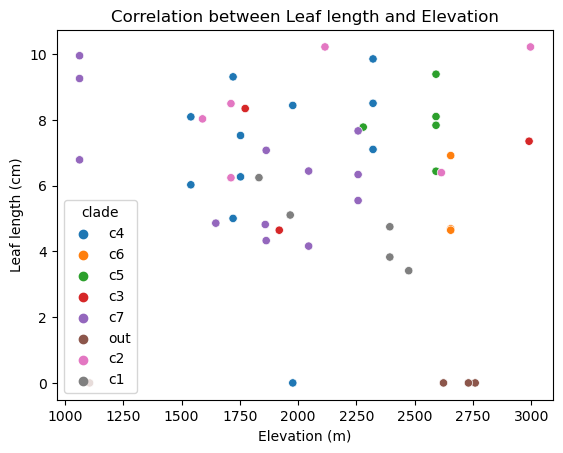

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
#scatterplot with data
ax = sns.scatterplot(x="elevation", y="length", hue="clade", data=corr)


#style
ax.set_title("Correlation between Leaf length and Elevation")
ax.set_xlabel("Elevation (m)")
ax.set_ylabel("Leaf length (cm)")

In [93]:
from scipy import stats
pearson_corr, pvalue = stats.pearsonr(corr['elevation'], corr['length'])

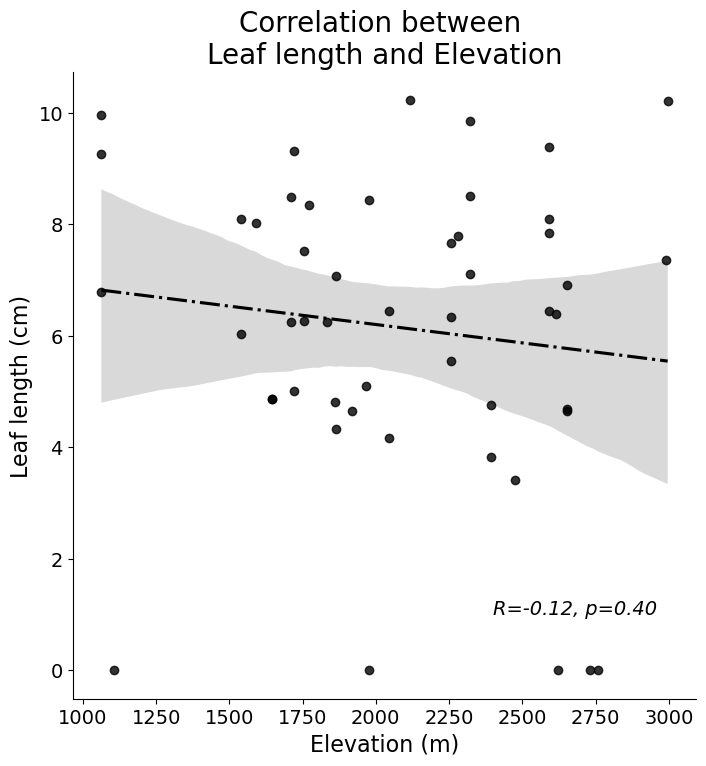

In [139]:
#add best fit line
sns.reset_orig()
ax = sns.lmplot(x="elevation", y="length", data=corr, height=7, scatter_kws={'color':'black'}, line_kws={'color': 'black', 'ls': '-.'});


# plt.legend(title='Company', fontsize=20)
plt.xlabel('Elevation (m)', fontsize=16);
plt.ylabel('Leaf length (cm)', fontsize=16);
plt.title('Correlation between \nLeaf length and Elevation', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.annotate(f"R={pearson_corr:.2f}, p={pvalue:.2f}", (2400, 1), fontsize=14, style='italic')

plt.savefig("./svgs/correlation_plot_lengthvselevation.svg")

In [52]:
cormat = corr.corr()
round(cormat,2)

,elevation,length
elevation,1.00,-0.12
length,-0.12,1.00


## Run Iqtree cross validation

In [ ]:
!iqtree -s ./analysis-window_extracter/10-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling.phy \
-alrt 1000 \
-bb 1000 \
-nt 4 \
-pre 10_IQtree_-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling \
-m TEST \
-T 36

In [2]:
#create analysis-iqtree/ folder
!mkdir -p analysis-iqtree

In [3]:
#move all results to the folder analysis-iqtree
!mv 10_IQtree_-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling* analysis-iqtree/.

In [4]:
!cp ./analysis-iqtree/10_IQtree_-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling.treefile \
./analysis-iqtree/10_IQtree_-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling.treefile.bkp

In [5]:
# Separate support values in different trees, in this run I ask for SH-aLRT support (%) / ultrafast bootstrap support (%).
!sed -e 's/\/[0-9.]*//g' "./analysis-iqtree/10_IQtree_-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling.treefile.bkp" > "./analysis-iqtree/10_IQtree_-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling.treefile.sh-alrt"
!sed -e 's/[0-9.]*\///g' "./analysis-iqtree/10_IQtree_-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling.treefile.bkp" > "./analysis-iqtree/10_IQtree_-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling.ultrafastbootstrap"

In [10]:
import toytree
treeFile = "./analysis-iqtree/10_IQtree_-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling.treefile.sh-alrt"
tre = toytree.tree(treeFile)

In [11]:
#Root tree
# rtre = tre.root(wildcard="pastasanum_PWS_1799") #this is the assembly name
rtre = tre.root(outgroup)

# Do some rotations to fit with geo
# for i in [96]:
#     rtre.idx_dict[i].children.reverse()
#     rtre._coords.update()


#Set new names
labels_updated = [namedict[i] for i in rtre.get_tip_labels()]
# color_labels = []

#Set color base on leaf form
# for i in labels_updated:
#     result = "Black"
#     for key, item in colordict.items():
#         if i.find(key) > -1:
#             result = item
#     color_labels.append(result)


#Collapse weak supported nodes
# rtre = rtre.collapse_nodes(min_support=75)

#Define threshold
support_value_threshold = 84



canvas, axes, marks = rtre.draw(
    height=900, width=600, 
    use_edge_lengths=True,
    tip_labels_align=True,
    tip_labels_style={"font-size": "12px"},
    tip_labels=labels_updated,
#     tip_labels_colors=color_labels,
    node_sizes=[5 if i else 0 for i in rtre.get_node_values()],
    node_colors=['black' if (i and int(i) > support_value_threshold) else 'white' for i in rtre.get_node_values('support', 1, 1)],
#     node_colors=colors,
    node_style={"stroke": "black", "stroke-width": 1},
    node_labels="support",
    # node_labels=['' if (i and int(i) > support_value_threshold) else i for i in rtre.get_node_values('support', 1, 0)],
    node_labels_style= {
        "-toyplot-anchor-shift": "15px",
        "baseline-shift": "0px",
        "text-shadow": "0.5px 0.5px #fff, -0.5px 0.5px #fff, 0.5px -0.5px #fff, -0.5px -0.5px #fff",
        "fill": "#000",
        "font-size": 8,
    },
#     node_labels="idx",
);


# add title
canvas.text(30,30, f"{treeFile.split('/')[2]}", style={"text-anchor":"start", "font-size":"14px"});

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="600.0px" height="900.0px" viewBox="0 0 600.0 900.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t5fbd5295606545b49725dd2a1c4ed558"> 100.0 100.0 100.0 95.8 100.0 100.0 100.0 100.0 100.0 66.9 91.7 100.0 88.0 97.6 100.0 100.0 76.5 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 68.2 100.0 100.0 100.0 100.0 98.9 100.0 100.0 100.0 28.3 100.0 100.0 97.5 100.0 86.7 100.0 100.0 100.0 100.0 100.0 new_name_2-PWS_3910 new_name_2-PWS_3909 new_name_2-PWS_3913 new_name_2-PWS_3912 new_name_2-PWS_3911 new_name_2-PWS_3899 new_name_2-PWS_3898 new_name_2-PWS_3900 new_name_2-PWS_3895 new_name_2-PWS_3894 new_name_2-PWS_3896 new_name_2-PWS_3897minus new_name_2-PWS_3897 seemenii-PWS_3903 seemenii-PWS_3902 seemenii-PWS_3901 seemenii-PWS_3907 seemenii-PWS_3904 seemenii-PWS_3905 seemenii-PWS_3908 seemenii-PWS_3906 seemenii-PWS_3887 seemenii-PWS_3886 seemenii-PWS_3892 seemenii-PWS_3889 seemenii-PWS_3888 seemenii-PWS_3891 seemenii-PWS_3890 seemenii-PWS_3893 seemenii-PWS_3884 seemenii-PWS_3883 seemenii-PWS_3885 seemenii-Maldonado_3040 seemenii-Fuentes_4724 seemenii-Fuentes_8750 seemenii-PWS_4024 seemenii-PWS_4023 seemenii-PWS_4025 seemenii-PWS_4022 seemenii-PWS_4021 seemenii-PWS_4020 incarum-PWS_4028 incarum-PWS_4027 incarum-PWS_4026 incarum-PWS_4030 incarum-PWS_4029 new_name_1-PWS_4011 ayavacense-PWS_4002 new_name_1-PWS_1769 new_name_1-Edwards_2014_04 10_IQtree_-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling.treefile.sh-alrt

In [12]:
import toyplot.pdf

toyplot.svg.render(canvas, "./svgs/10_IQtree_-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling.svg")

In [13]:
# update label not only for presentation, this creates a new tree with current names, and exports it.
updateddict = {}
for i in rtre.get_tip_labels():
    updateddict[i] = namedict[i]

    
testtre = rtre.set_node_values(
    feature="name",
    values=updateddict,
)

testtre.write(f"{treeFile}_RENAMED", tree_format=0)